# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [4]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.info()
transactions.describe()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [6]:
# TODO: view the shape of your data
transactions.shape
print(f"The dataset contains {transactions.shape[0]:,} rows and {transactions.shape[1]} columns.")


The dataset contains 1,000,000 rows and 10 columns.


## EDA & Reflection Questions

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

## Q1: Distribution of Numeric Features

Here I want to understand how transaction amounts and account balances are distributed. This helps identify common behaviors versus rare, potentially suspicious transactions.


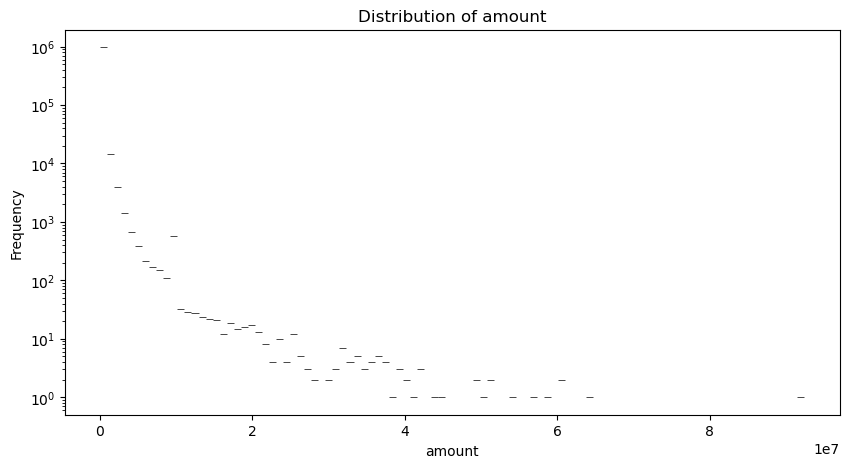

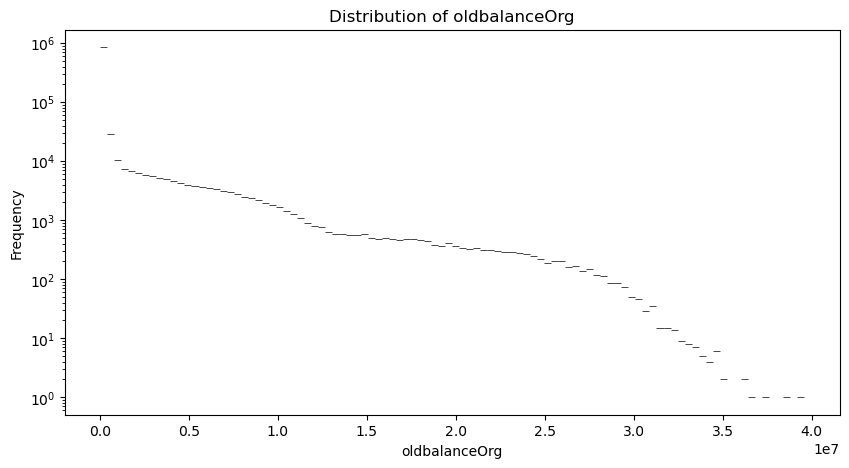

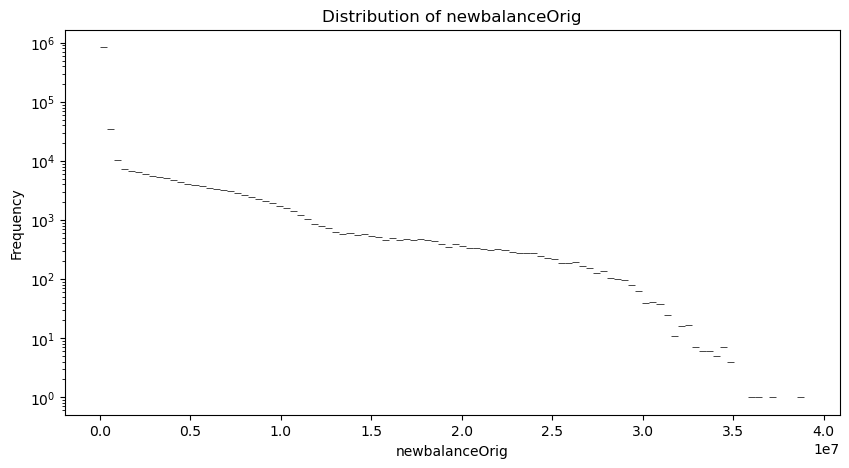

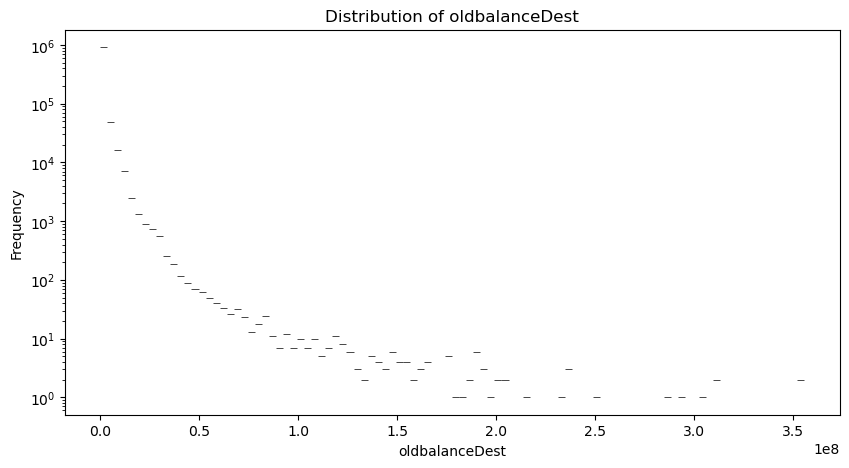

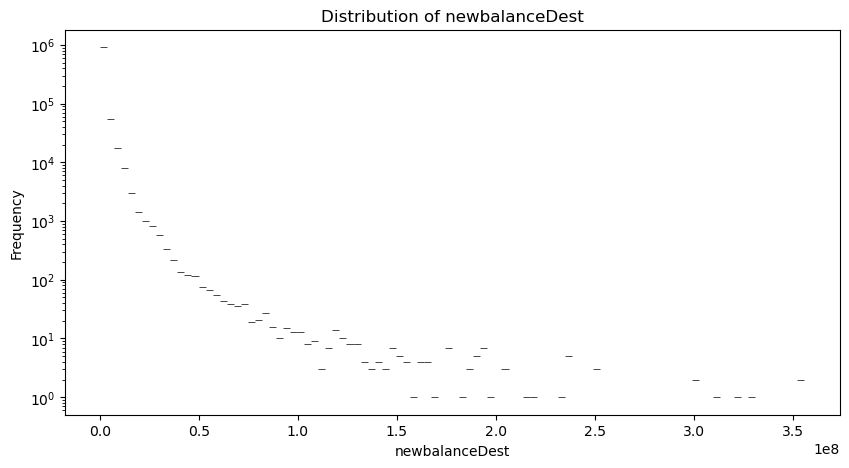

In [7]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(transactions[col], bins=100, log_scale=(False, True))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

## Q2: Numeric Features vs Fraud Status

Here I compare pairs of numeric features to spot unusual patterns or clusters that might help identify fraudulent transactions.


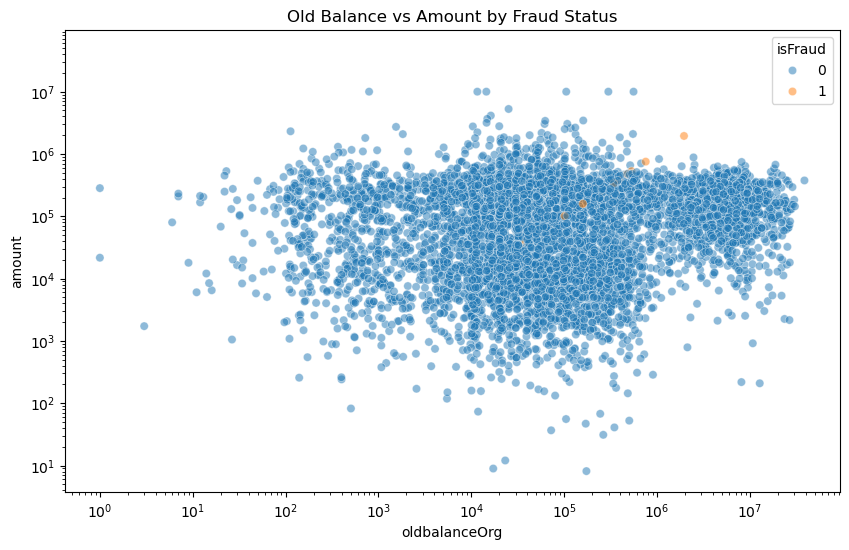

In [8]:
# Example: amount vs oldbalanceOrg, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceOrg', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

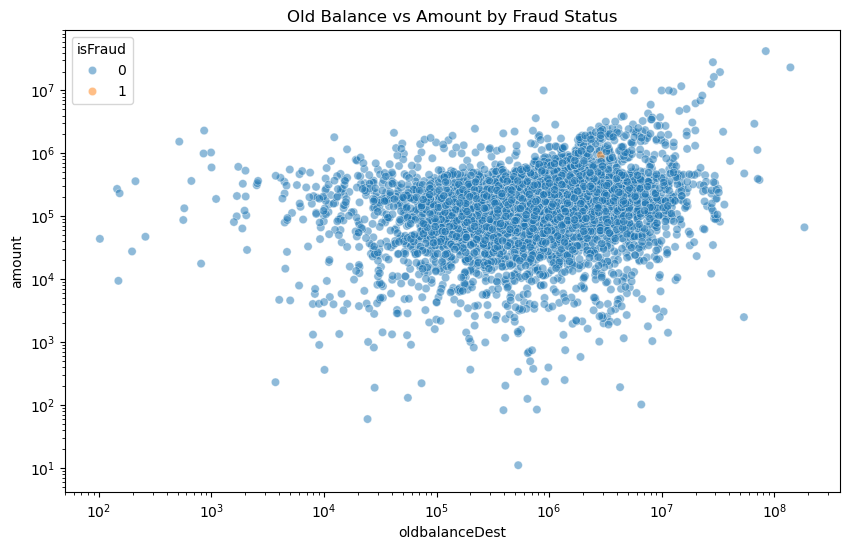

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='oldbalanceDest', y='amount', hue='isFraud', alpha=0.5)
plt.title('Old Balance vs Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

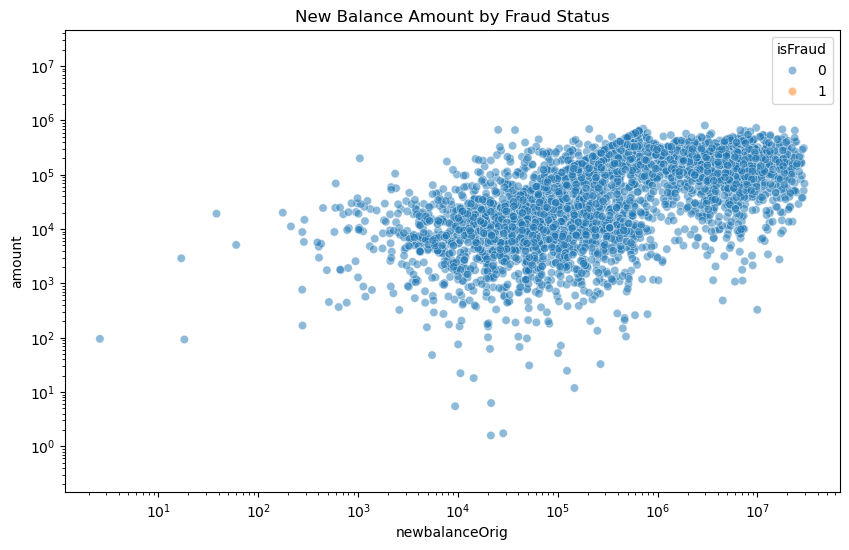

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions.sample(10000), x='newbalanceOrig', y='amount', hue='isFraud', alpha=0.5)
plt.title('New Balance Amount by Fraud Status')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

## Q3: Transaction Type vs Amount

Here I wanted to analyze how transaction amounts vary based on transaction type. I used boxplots and summary stats to determine if certain transaction types consistently involve higher amounts.


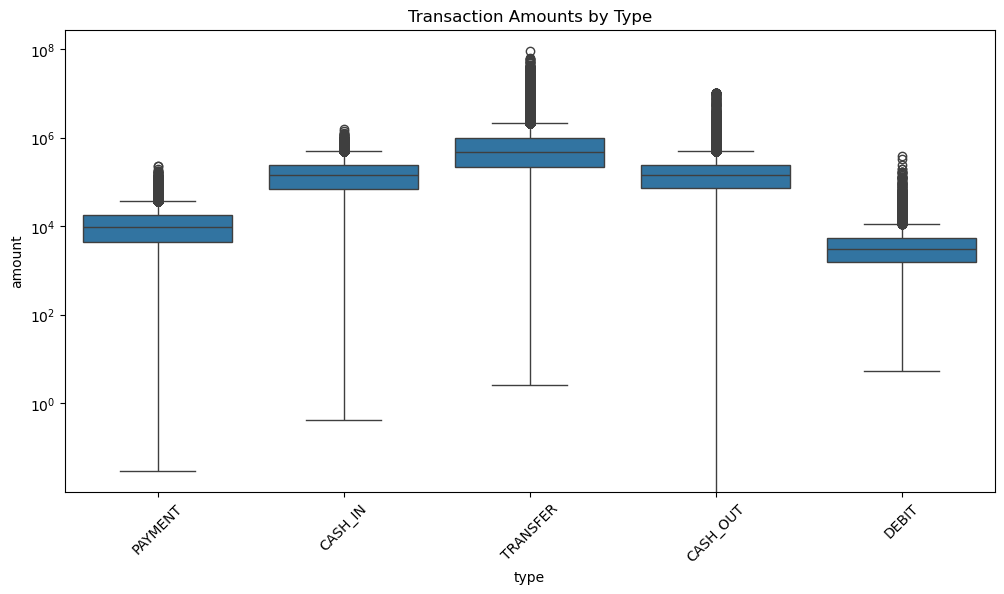

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=transactions, x='type', y='amount')
plt.title('Transaction Amounts by Type')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

transactions.groupby('type')['amount'].describe()


### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

## Q4: Average Transaction Amount by Type and Fraud Status

This part of the EDA focuses on how fraudulent vs non-fraudulent transactions vary in size for each transaction type.


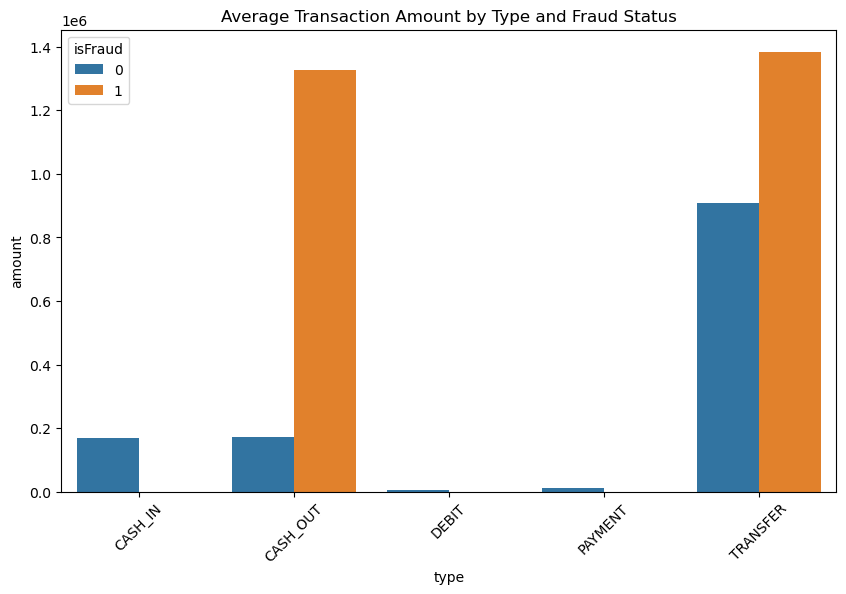

In [12]:
# Average amount by type and fraud status
fraud_amounts = transactions.groupby(['type', 'isFraud'])['amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_amounts, x='type', y='amount', hue='isFraud')
plt.title('Average Transaction Amount by Type and Fraud Status')
plt.xticks(rotation=45)
plt.show()


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5: Fraud Flag vs Actual Fraud

Here I planned to evaluate how often the system’s `isFlaggedFraud` correctly identifies actual fraud, and how often it misses or wrongly flags transactions.


In [13]:
pd.crosstab(transactions['isFraud'], transactions['isFlaggedFraud'], margins=True, normalize='index')


isFlaggedFraud,0,1
isFraud,,
0,1.000000,0.000000
1,0.999229,0.000771
All,0.999999,0.000001


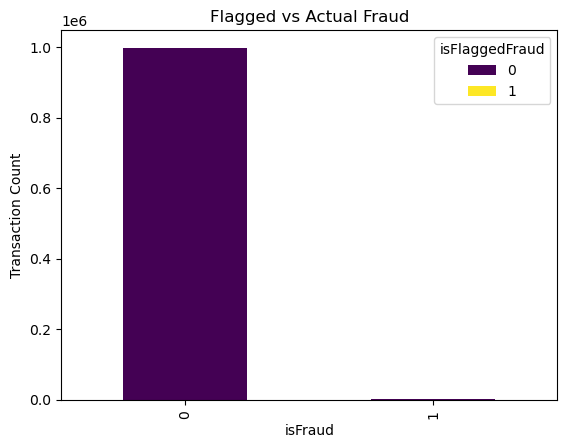

In [16]:
cross = pd.crosstab(transactions['isFraud'], transactions['isFlaggedFraud'])
cross.plot(kind='bar', stacked=True, colormap='viridis', title='Flagged vs Actual Fraud')
plt.xlabel('isFraud')
plt.ylabel('Transaction Count')
plt.legend(title='isFlaggedFraud')
plt.show()

### Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here